**Backpropagation from scratch with Python**



Backpropagation is arguably the most important algorithm in neural network history — without (efficient) backpropagation, it would be impossible to train deep learning networks to the depths that we see today. Backpropagation can be considered the cornerstone of modern neural networks and deep learning.

Click here to download the source code to this post

Backpropagation is arguably the most important algorithm in neural network history — without (efficient) backpropagation, it would be impossible to train deep learning networks to the depths that we see today. Backpropagation can be considered the cornerstone of modern neural networks and deep learning.


The original incarnation of backpropagation was introduced back in the 1970s, but it wasn’t until the seminal 1988 paper, Learning representations by back-propagating errors by Rumelhart, Hinton, and Williams, were we able to devise a faster algorithm, more adept to training deeper networks.

There are quite literally hundreds (if not thousands) of tutorials on backpropagation available today. Some of my favorites include:

Andrew Ng’s discussion on backpropagation inside the Machine Learning course by Coursera.
The heavily mathematically motivated Chapter 2 — How the backpropagation algorithm works from Neural Networks and Deep Learning by Michael Nielsen.
Stanford’s cs231n exploration and analysis of backpropagation.
Matt Mazur’s excellent concrete example (with actual worked numbers) that demonstrates how backpropagation works.

**Backpropagation**
The backpropagation algorithm consists of two phases:

The forward pass where our inputs are passed through the network and output predictions obtained (also known as the propagation phase).
The backward pass where we compute the gradient of the loss function at the final layer (i.e., predictions layer) of the network and use this gradient to recursively apply the chain rule to update the weights in our network (also known as the weight update phase).

Click here to download the source code to this post

Backpropagation is arguably the most important algorithm in neural network history — without (efficient) backpropagation, it would be impossible to train deep learning networks to the depths that we see today. Backpropagation can be considered the cornerstone of modern neural networks and deep learning.


The original incarnation of backpropagation was introduced back in the 1970s, but it wasn’t until the seminal 1988 paper, Learning representations by back-propagating errors by Rumelhart, Hinton, and Williams, were we able to devise a faster algorithm, more adept to training deeper networks.

There are quite literally hundreds (if not thousands) of tutorials on backpropagation available today. Some of my favorites include:

Andrew Ng’s discussion on backpropagation inside the Machine Learning course by Coursera.
The heavily mathematically motivated Chapter 2 — How the backpropagation algorithm works from Neural Networks and Deep Learning by Michael Nielsen.
Stanford’s cs231n exploration and analysis of backpropagation.
Matt Mazur’s excellent concrete example (with actual worked numbers) that demonstrates how backpropagation works.
As you can see, there are no shortage of backpropagation guides — instead of regurgitating and reiterating what has been said by others hundreds of times before, I’m going to take a different approach and do what makes PyImageSearch publications special:

Construct an intuitive, easy to follow implementation of the backpropagation algorithm using the Python language.

Inside this implementation, we’ll build an actual neural network and train it using the back propagation algorithm. By the time you finish this section, you’ll understand how backpropagation works — and perhaps more importantly, you’ll have a stronger understanding of how this algorithm is used to train neural networks from scratch.


Looking for the source code to this post?
JUMP RIGHT TO THE DOWNLOADS SECTION 
Backpropagation
The backpropagation algorithm consists of two phases:

The forward pass where our inputs are passed through the network and output predictions obtained (also known as the propagation phase).
The backward pass where we compute the gradient of the loss function at the final layer (i.e., predictions layer) of the network and use this gradient to recursively apply the chain rule to update the weights in our network (also known as the weight update phase).
We’ll start by reviewing each of these phases at a high level. From there, we’ll implement the backpropagation algorithm using Python. Once we have implemented backpropagation we’ll want to be able to make predictions using our network — this is simply the forward pass phase, only with a small adjustment (in terms of code) to make the predictions more efficient.

Finally, I’ll demonstrate how to train a custom neural network using backpropagation and Python on both the:

XOR dataset
MNIST dataset
The Forward Pass
The purpose of the forward pass is to propagate our inputs through the network by applying a series of dot products and activations until we reach the output layer of the network (i.e., our predictions). To visualize this process, let’s first consider the XOR dataset (Table 1, left).

x0	x1	y		x0	x1	x2
0	  0	  0		0	  0	  1
0	  1	  1		0	  1   1
1	  0	  1		1	  0	  1
1	  1	  0		1	  1	  1

Here, we can see that each entry X in the design matrix (left) is 2-dim — each data point is represented by two numbers. For example, the first data point is represented by the feature vector (0, 0), the second data point by (0, 1), etc. We then have our output values y as the right column. Our target output values are the class labels. Given an input from the design matrix, our goal is to correctly predict the target output value.

To obtain perfect classification accuracy on this problem we’ll need a feedforward neural network with at least a single hidden layer, so let’s go ahead and start with a 2−2−1 architecture (Figure 1, top). This is a good start; however, we’re forgetting to include the bias term. There are two ways to include the bias term b in our network. We can either:

Use a separate variable.
Treat the bias as a trainable parameter within the weight matrix by inserting a column of 1’s into the feature vectors.

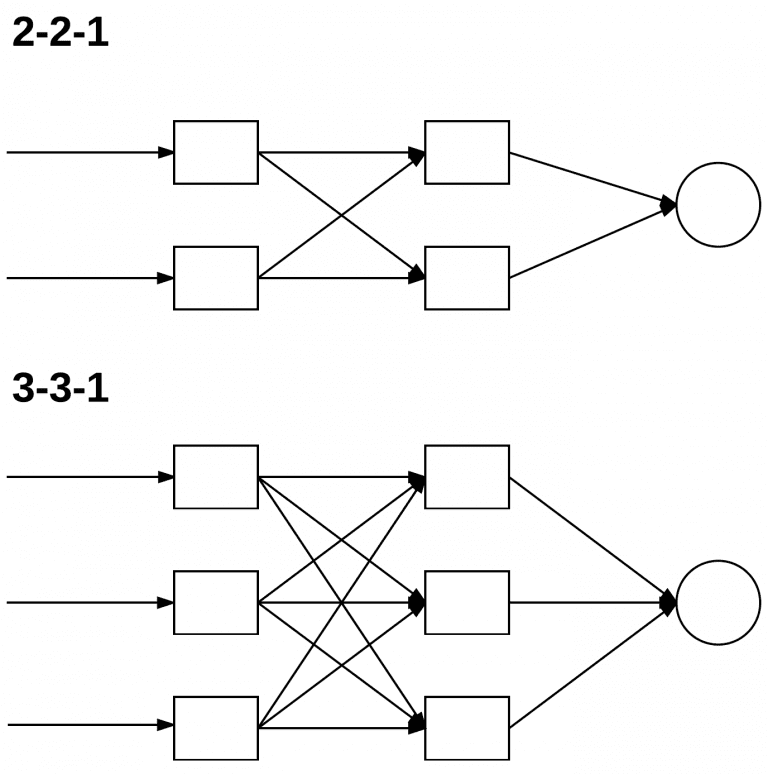

Inserting a column of 1’s into our feature vector is done programmatically, but to ensure we understand this point, let’s update our XOR design matrix to explicitly see this taking place (Table 1, right). As you can see, a column of 1’s have been added to our feature vectors. In practice you can insert this column anywhere you like, but we typically place it either as (1) the first entry in the feature vector or (2) the last entry in the feature vector.

Since we have changed the size of our input feature vector (normally performed inside neural network implementation itself so that we do not need to explicitly modify our design matrix), that changes our (perceived) network architecture from 2−2−1 to an (internal) 3−3−1 (Figure 1, bottom).

We’ll still refer to this network architecture as 2−2−1, but when it comes to implementation, it’s actually 3−3−1 due to the addition of the bias term embedded in the weight matrix.

Finally, recall that both our input layer and all hidden layers require a bias term; however, the final output layer does not require a bias. The benefit of applying the bias trick is that we do not need to explicitly keep track of the bias parameter any longer — it is now a trainable parameter within the weight matrix, thus making training more efficient and substantially easier to implement.

To see the forward pass in action, we first initialize the weights in our network, as in Figure 2. Notice how each arrow in the weight matrix has a value associated with it — this is the current weight value for a given node and signifies the amount in which a given input is amplified or diminished. This weight value will then be updated during the backpropagation phase.

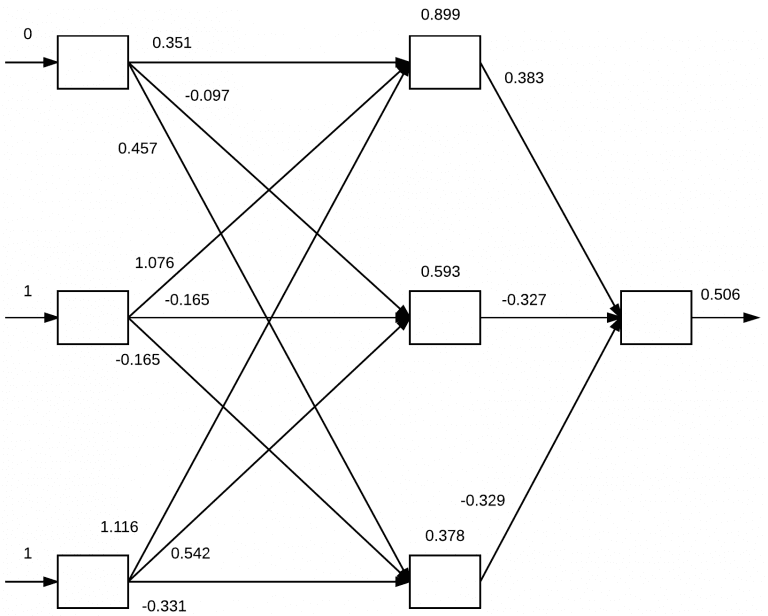

On the far left of Figure 2, we present the feature vector (0, 1, 1) (and target output value 1 to the network). Here we can see that 0, 1, and 1 have been assigned to the three input nodes in the network. To propagate the values through the network and obtain the final classification, we need to take the dot product between the inputs and the weight values, followed by applying an activation function (in this case, the sigmoid function, σ).

Let’s compute the inputs to the three nodes in the hidden layers:

σ((0×0.351) + (1×1.076) + (1×1.116)) = 0.899
σ((0× −0.097) + (1× −0.165) + (1×0.542)) = 0.593
σ((0×0.457) + (1× −0.165) + (1× −0.331)) = 0.378
Looking at the node values of the hidden layers (Figure 2, middle), we can see the nodes have been updated to reflect our computation.

We now have our inputs to the hidden layer nodes. To compute the output prediction, we once again compute the dot product followed by a sigmoid activation:

(1) σ((0.899×0.383) + (0.593× −0.327) + (0.378× −0.329)) = 0.506

The output of the network is thus 0.506. We can apply a step function to determine if this output is the correct classification or not:

f(\textit{net}) = \begin{cases} 1 & \textit{if net} > 0 \\ 0 & \textit{otherwise} \end{cases}
Applying the step function with net = 0.506 we see that our network predicts 1 which is, in fact, the correct class label. However, our network is not very confident in this class label — the predicted value 0.506 is very close to the threshold of the step. Ideally, this prediction should be closer to 0.98−0.99, implying that our network has truly learned the underlying pattern in the dataset. In order for our network to actually “learn,” we need to apply the backward pass.

**The Backward Pass**
To apply the backpropagation algorithm, our activation function must be differentiable so that we can compute the partial derivative of the error with respect to a given weight wi, j, loss (E), node output oj, and network output netj.

(2) \displaystyle\frac{\partial E}{\partial w_{i,j}} = \displaystyle\frac{\partial E}{\partial o_{j}} \displaystyle\frac{\partial o_{j}}{\partial net_{j}} \displaystyle\frac{\partial net_{j}}{\partial w_{i,j}}
As the calculus behind backpropagation has been exhaustively explained many times in previous works (see Andrew Ng, Michael Nielsen, and Matt Mazur), I’m going to skip the derivation of the backpropagation chain rule update and instead explain it via code in the following section.

For the mathematically astute, please see the references above for more information on the chain rule and its role in the backpropagation algorithm. By explaining this process in code, my goal is to help readers understand backpropagation through a more intuitive, implementation sense.

Implementing Backpropagation with Python
Let’s go ahead and get started implementing backpropagation. Open a new file, name it neuralnetwork.py, store it in the nn submodule of pyimagesearch (like we did with perceptron.py), and let’s get to work:


In [1]:
# import the necessary packages
import numpy as np
class NeuralNetwork:
	def __init__(self, layers, alpha=0.1):
		# initialize the list of weights matrices, then store the
		# network architecture and learning rate
		self.W = []
		self.layers = layers
		self.alpha = alpha

On Line 2, we import the only required package we’ll need for our implementation of back propagation — the NumPy numerical processing library.

Line 5 then defines the constructor to our NeuralNetwork class. The constructor requires a single argument, followed by a second optional one:

layers: A list of integers which represents the actual architecture of the feedforward network. For example, a value of [2, 2, 1] would imply that our first input layer has two nodes, our hidden layer has two nodes, and our final output layer has one node.
alpha: Here we can specify the learning rate of our neural network. This value is applied during the weight update phase.
Line 8 initializes our list of weights for each layer, W. We then store layers and alpha on Lines 9 and 10.

Our weights list W is empty, so let’s go ahead and initialize it now:

In [2]:
import numpy 
x1=0.1
x2=0.4

target = 0.7
learning_rate = 0.01

w1=numpy.random.rand()
w2=numpy.random.rand()

print("Initial W : ", w1, w2)

predicted_output = []
network_error = []

Initial W :  0.9323002449124675 0.7943897367857421


Quick overview of Neural Network architecture
In the simplest scenario, the architecture of a neural network consists of some sequential layers, where the layer numbered i is connected to the layer numbered i+1. The layers can be classified into 3 classes:

Input
Hidden
Output
The next figure shows an example of a fully-connected artificial neural network (FCANN), the simplest type of network for demonstrating how the backpropagation algorithm works. The network has an input layer, 2 hidden layers, and an output layer. In the figure, the network architecture is presented horizontally so that each layer is represented vertically from left to right. 

Each layer consists of 1 or more neurons represented by circles. Because the network type is fully-connected, then each neuron in layer i is connected with all neurons in layer i+1. If 2 subsequent layers have X and Y neurons, then the number of in-between connections is X*Y.

For each connection, there is an associated weight. The weight is a floating-point number that measures the importance of the connection between 2 neurons. The higher the weight, the more important the connection. The weights are the learnable parameter by which the network makes a prediction. If the weights are good, then the network makes accurate predictions with less error. Otherwise, the weight should be updated to reduce the error.

Assume that a neuron N1 at layer 1 is connected to another neuron N2 at layer 2. Assume also that the value of N2 is calculated according to the next linear equation.

N2=w1N1+b

If N1=4, w1=0.5 (the weight) and b=1 (the bias), then the value of N2 is 3.

N2=0.54+1=2+1=3

This is how a single weight connects 2 neurons together. Note that the input layer has no learnable parameters at all.

Each neuron at layer i+1 has a weight for each connected neuron at layer i , but it only has a single bias. So, if layer i has 10 neurons and layer i+1 has 6 neurons, then the total number of parameters for layer i+1 is:

number of weights+number of biases=10×6 +6=66

The input layer is the first layer in the network, it’s directly connected by the network’s inputs. There can only be a single input layer in the network. For example, if the inputs are student scores in a semester, then these grades are connected to the input layer. In our figure, the input layer has 10 neurons (e.g. scores for 10 courses — a hero student took 10 courses/semester).

The output layer is the last layer which returns the network’s predicted output. Like the input layer, there can only be a single output layer. If the objective of the network is to predict student scores in the next semester, then the output layer should return a score. The architecture in the next figure has a single neuron that returns the next semester’s predicted score.

Between the input and output layers, there might be 0 or more hidden layers. In this example, there are 2 hidden layers with 6 and 4 neurons, respectively. Note that the last hidden layer is connected to the output layer.

Usually, each neuron in the hidden layer uses an activation function like sigmoid or rectified linear unit (ReLU). This helps to capture the non-linear relationship between the inputs and their outputs. The neurons in the output layer also use activation functions like sigmoid (for regression) or SoftMax (for classification).

Backpropagation architecture
Architecture created using the NN-SVG online tool.
After building the network architecture, it’s time to start training it with data.

Create free account in Neptune
Log, store, display, organize, compare and query all your MLOps metadata.

Register

Forward and backward passes in Neural Networks
To train a neural network, there are 2 passes (phases):

Forward
Backward
In the forward pass, we start by propagating the data inputs to the input layer, go through the hidden layer(s), measure the network’s predictions from the output layer, and finally calculate the network error based on the predictions the network made. 

This network error measures how far the network is from making the correct prediction. For example, if the correct output is 4 and the network’s prediction is 1.3, then the absolute error of the network is 4-1.3=2.7. Note that the process of propagating the inputs from the input layer to the output layer is called forward propagation. Once the network error is calculated, then the forward propagation phase has ended, and backward pass starts. 

The next figure shows a red arrow pointing in the direction of the forward propagation.

In the backward pass, the flow is reversed so that we start by propagating the error to the output layer until reaching the input layer passing through the hidden layer(s). The process of propagating the network error from the output layer to the input layer is called backward propagation, or simple backpropagation. The backpropagation algorithm is the set of steps used to update network weights to reduce the network error.

In the next figure, the blue arrow points in the direction of backward propagation.

The forward and backward phases are repeated from some epochs. In each epoch, the following occurs:

The inputs are propagated from the input to the output layer.
The network error is calculated.
The error is propagated from the output layer to the input layer.
Backpropagation passes architecture
Architecture created using the NN-SVG online tool.
We will focus on the backpropagation phase. Let’s discuss the advantages of using the backpropagation algorithm.

Why use the backpropagation algorithm?
Earlier we discussed that the network is trained using 2 passes: forward and backward. At the end of the forward pass, the network error is calculated, and should be as small as possible.

If the current error is high, the network didn’t learn properly from the data. What does this mean? It means that the current set of weights isn’t accurate enough to reduce the network error and make accurate predictions. As a result, we should update network weights to reduce the network error. 

The backpropagation algorithm is one of the algorithms responsible for updating network weights with the objective of reducing the network error. It’s quite important.

Here are some of the advantages of the backpropagation algorithm:

It’s memory-efficient in calculating the derivatives, as it uses less memory compared to other optimization algorithms, like the genetic algorithm. This is a very important feature, especially with large networks.
The backpropagation algorithm is fast, especially for small and medium-sized networks. As more layers and neurons are added, it starts to get slower as more derivatives are calculated. 
This algorithm is generic enough to work with different network architectures, like convolutional neural networks, generative adversarial networks, fully-connected networks, and more.
There are no parameters to tune the backpropagation algorithm, so there’s less overhead. The only parameters in the process are related to the gradient descent algorithm, like learning rate.
Next, let’s see how the backpropagation algorithm works, based on a mathematical example.

How backpropagation algorithm works
How the algorithm works is best explained based on a simple network, like the one given in the next figure. It only has an input layer with 2 inputs (X1 and X2), and an output layer with 1 output. There are no hidden layers.

The weights of the inputs are W1 and W2, respectively.  The bias is treated as a new input neuron to the output neuron which has a fixed value +1 and a weight b. Both the weights and biases could be referred to as parameters.

Backpropagation parameters
Figure taken from this book: Ahmed Gad, Practical Computer Vision Applications Using Deep Learning with CNNs, 978-1484241660. 2018, Apress 
Let’s assume that output layer uses the sigmoid activation function defined by the following equation:

Backpropagation equation 1
Where s is the sum of products (SOP) between each input and its corresponding weight:

s=X1* W1+ X2*W2+b

To make things simple, a single training sample is used in this example. The next table shows the single training sample with the input and its corresponding desired (i.e. correct) output for the sample. In practice, more training examples are used.

X1
X2
Desired Output
0.1

0.3

0.03

Assume that the initial values for both weights and bias are like in the next table.

W1
W2
b
0.5

0.2

1.83

For simplicity, the values for all inputs, weights, and bias will be added to the network diagram.

Backpropagation network diagram
Figure taken from this book: Ahmed Gad, Practical Computer Vision Applications Using Deep Learning with CNNs, 978-1484241660. 2018, Apress 
Now, let’s train the network and see how the network will predict the output of the sample based on the current parameters. 

As we discussed previously, the training process has 2 phases, forward and backward. 

Forward pass
The input of the activation function will be the SOP between each input and its weight. The SOP is then added to the bias to return the output of the neuron:

s=X1* W1+ X2*W2+b

s=0.1* 0.5+ 0.3*0.2+1.83

s=1.94

The value 1.94 is then applied to the activation function (sigmoid), which results in the value 0.874352143.


Backpropagation equation
Backpropagation equation
Backpropagation equation
Backpropagation equation
The output of the activation function from the output neuron reflects the predicted output of the sample. It’s obvious that there’s a difference between the desired and expected output. But why? How do we make predicted output closer to desired output? We’ll answer these questions later. For now, let’s see the error of our network based on an error function. 

The error functions tell how close the predicted output(s) are from the desired output(s). The optimal value for error is zero, meaning there’s no error at all, and both desired and predicted results are identical. One of the error functions is the squared error function, as defined in the next equation:

Note that the value 12 multiplied by the equation is for simplifying the derivatives calculation using the backpropagation algorithm. 

Based on the error function, we can measure the error of our network as follows:

Backpropagation equation
Backpropagation equation
Backpropagation equation
Backpropagation equation
Backpropagation equation
The result shows that there is an error, and a large one: (~0.357). The error just gives us an indication of how far the predicted results are from the desired results. 

Knowing that there’s an error, what should we do? We should minimize it. To minimize network error, we must change something in the network. Remember that the only parameters we can change are the weights and biases. We can try different weights and biases, and then test our network.

We calculate the error, then the forward pass ends, and we should start the backward pass to calculate the derivatives and update the parameters.

To practically feel the importance of the backpropagation algorithm, let’s try to update the parameters directly without using this algorithm.

Parameters update equation
The parameters can be changed according to the next equation:

W(n+1)=W(n)+η[d(n)-Y(n)]X(n)

Where:

n: Training step (0, 1, 2, …).
W(n): Parameters in current training step. Wn=[bn,W1(n),W2(n),W3(n),…, Wm(n)]
η: Learning rate with a value between 0.0 and 1.0.
d(n): Desired output.
Y(n): Predicted output.
X(n): Current input at which the network made false prediction.
For our network, these parameters have the following values:

n: 0
W(n): [1.83, 0.5, 0.2]
η: Because it is a hyperparameter, then we can choose it 0.01 for example.
d(n): [0.03].
Y(n): [0.874352143].
X(n): [+1, 0.1, 0.3]. First value (+1) is for the bias.
We can update our network parameters as follows:

W(n+1)=W(n)+η[d(n)-Y(n)]X(n)

=[1.83, 0.5, 0.2]+0.01[0.03-0.874352143][+1, 0.1, 0.3]

=[1.83, 0.5, 0.2]+0.01[-0.844352143][+1, 0.1, 0.3]

=[1.83, 0.5, 0.2]+-0.00844352143[+1, 0.1, 0.3]

=[1.83, 0.5, 0.2]+[-0.008443521, -0.000844352, -0.002533056]

=[1.821556479, 0.499155648, 0.197466943]

The new parameters are listed in the next table:

W1new
W2new
bnew
0.197466943

0.499155648

1.821556479

Based on the new parameters, we will recalculate the predicted output. The new predicted output is used to calculate the new network error. The network parameters are updated according to the calculated error. The process continues to update the parameters and recalculate the predicted output until it reaches an acceptable value for the error.

Here, we successfully updated the parameters without using the backpropagation algorithm. Do we still need that algorithm? Yes. You’ll see why.

The parameters-update equation just depends on the learning rate to update the parameters. It changes all the parameters in a direction opposite to the error. 

But, using the backpropagation algorithm, we can know how each single weight correlates with the error. This tells us the effect of each weight on the prediction error. That is, which parameters do we increase, and which ones do we decrease to get the smallest prediction error?

For example, the backpropagation algorithm could tell us useful information, like that increasing the current value of W1 by 1.0 increases the network error by 0.07. This shows us that a smaller value for W1 is better to minimize the error.

Partial derivative
One important operation used in the backward pass is to calculate derivatives. Before getting into the calculations of derivatives in the backward pass, we can start with a simple example to make things easier.

For a multivariate function such as Y=X2Z+H, what’s the effect on the output Y given a change in variable X? We can answer this using partial derivatives, as follows:

Backpropagation equation
Backpropagation equation
Backpropagation equation
Note that everything except X is regarded as a constant. Therefore, H is replaced by 0 after calculating a partial derivative. Here, ∂X means a tiny change of variable X. Similarly, ∂Y means a tiny change of Y. The change of Y is the result of changing X. By making a very small change in X, what’s the effect on Y? 

The small change can be an increase or decrease by a tiny value. By substituting the different values of X, we can find how Ychanges with respect to X.

The same procedure can be followed to learn how the NN prediction error changes W.R.T changes in network weights. So, our target is to calculate ∂E/W1 and ∂E/W2 as we have just two weights W1 and W2. Let’s calculate them.

Derivatives of the Prediction Error W.R.T Parameters
Looking at this equation, Y=X2Z+H, it seems straightforward to calculate the partial derivative ∂Y/∂X because there’s an equation relating both Yand X. In our case, there’s no direct equation in which both the prediction error and the weights exist. So, we’re going to use the multivariate chain rule to find the partial derivative of Y W.R.T X.

Prediction Error to Parameters Chain
Let’s try to find the chain relating the prediction error to the weights. The prediction error is calculated based on this equation:

Backpropagation equation
This equation doesn`t have any parameter. No problem, we can inspect how each term (desired & predicted) of the previous equation is calculated, and substitute with its equation until reaching the parameters. 

The desired term in the previous equation is a constant, so there’s no chance for reaching parameters through it. The predicted term is calculated based on the sigmoid function, like in the next equation:

Backpropagation equation
Again, the equation for calculating the predicted output doesn’t have any parameter. But there’s still variable s (SOP) that already depends on parameters for its calculation, according to this equation:

s=X1* W1+ X2*W2+b

Once we’ve reached an equation that has the parameters (weights and biases), we’ve reached the end of the derivative chain. The next figure presents the chain of derivatives to follow to calculate the derivative of the error W.R.T the parameters. 

Note that the derivative of s W.R.T the bias b (∂s/W1) is 0, so it can be omitted. The bias can simply be updated using the learning rate, as we did previously. This leaves us to calculate the derivatives of the 2 weights.

Backpropagation prediction
Figure taken from this book: Ahmed Gad, Practical Computer Vision Applications Using Deep Learning with CNNs, 978-1484241660. 2018, Apress 
According to the previous figure, to know how prediction error changes W.R.T changes in the parameters we should find the following intermediate derivatives:

Network error W.R.T the predicted output. 
Predicted output W.R.T the SOP. 
SOP W.R.T each of the 3 parameters. 
As a total, there are four intermediate partial derivatives:

∂E/∂Predicted, ∂Predicted/∂s, ∂s/W1 and ∂s/W2

To calculate the derivative of the error W.R.T the weights, simply multiply all the derivatives in the chain from the error to each weight, as in the next 2 equations:

∂E/W1=∂E/∂Predicted* ∂Predicted/∂s* ∂s/W1

∂EW2=∂E/∂Predicted* ∂Predicted/∂s* ∂s/W2

Important note: We used the derivative chain solution because there was no direct equation relating the error and the parameters together. But, we can create an equation relating them and applying partial derivatives directly to it:

E=1/2(desired-1/(1+e-(X1* W1+ X2*W2+b))2

Because this equation seems complex to calculate the derivative of the error W.R.T the parameters directly, it’s preferred to use the multivariate chain rule for simplicity.

Calculating partial derivatives values by substitution
Let’s calculate partial derivatives of each part of the chain we created.

For the derivative of the error W.R.T the predicted output:

∂E/∂Predicted=∂/∂Predicted(1/2(desired-predicted)2)

=2*1/2(desired-predicted)2-1*(0-1)

=(desired-predicted)*(-1)

=predicted-desired

By substituting by the values:

∂E/∂Predicted=predicted-desired=0.874352143-0.03

∂E/∂Predicted=0.844352143

For the derivative of the predicted output W.R.T the SOP:

∂Predicted/∂s=∂/∂s(1/(1+e-s))

Remember: the quotient rule can be used to find the derivative of the sigmoid function as follows:

∂Predicted/∂s=1/(1+e-s)(1-1/(1+e-s))

By substituting by the values:

∂Predicted/∂s=1/(1+e-s)(1-1/(1+e-s))=1/(1+e-1.94)(1-1/(1+e-1.94))

=1/(1+0.143703949)(1-1/(1+0.143703949))

=1/1.143703949(1-1/1.143703949)

=0.874352143(1-0.874352143)

=0.874352143(0.125647857)

∂Predicted/∂s=0.109860473

For the derivative of SOP W.R.T W1:

∂s/W1=∂/∂W1(X1* W1+ X2*W2+b)

=1*X1*(W1)(1-1)+ 0+0

=X1*(W1)(0)

=X1(1)

∂s/W1=X1

By substituting by the values:

∂s/W1=X1=0.1

For the derivative of SOP W.R.T W2:

∂s/W2=∂/∂W2(X1* W1+ X2*W2+b)

=0+1*X2*(W2)(1-1)+0

=X2*(W2)(0)

=X2(1)

∂s/W2=X2

By substituting by the values:

∂s/W2=X2=0.3

After calculating the individual derivatives in all chains, we can multiply all of them to calculate the desired derivatives (i.e. derivative of the error W.R.T each weight).

For the derivative of the error W.R.T W1:

∂E/W1=0.844352143*0.109860473*0.1

∂E/W1=0.009276093

For the derivative of the error W.R.T W2:

∂E/W2=0.844352143*0.109860473*0.3

∂E/W2=0.027828278

Finally, there are two values reflecting how the prediction error changes with respect to the weights:

0.009276093 for W1 

0.027828278 for W2

What do these values mean? These results need interpretation.

Interpreting results of backpropagation
There are two useful conclusions from each of the last two derivatives. These conclusions are obtained based on:

Derivative sign
Derivative magnitude (DM)
If the derivative sign is positive, that means increasing the weight increases the error. In other words, decreasing the weight decreases the error.

If the derivative sign is negative, increasing the weight decreases the error. In other words, if it’s negative then decreasing the weight increases the error.

But by how much does the error increase or decrease? The derivative magnitude answers this question. 

For positive derivatives, increasing the weight by p increases the error by DM*p. For negative derivatives, increasing the weight by p decreases the error by DM*p.

Let’s apply this to our example:

Because the result of the ∂E/W1 derivative is positive, this means if W1 increases by 1, then the total error increases by 0.009276093. 
Because the result of the ∂E/W2 derivative is positive, this means that if W2 increases by 1 then the total error increases by 0.027828278. 
Let’s now update the weights according to the calculated derivatives.

Updating weights
After successfully calculating the derivatives of the error with respect to each individual weight, we can update the weights to improve the prediction. Each weight is updated based on its derivative:

For W1:

W1new=W1-η*∂E/W1

=0.5-0.01*0.009276093

W1new=0.49990723907

For W2:

W2new=W2-η*∂E/W2

=0.2-0.01*0.027828278

W2new= 0.1997217172

Note that the derivative is subtracted (not added) from the old value of the weight, because the derivative is positive.

The new values for the weights are:

W1=0.49990723907
W2= 0.1997217172
These 2 weights, in addition to the bias (1.821556479) previously calculated, are used in a new forward pass to calculate the error. It’s expected that the new error will be smaller than the current error (0.356465271).

Here are the new forward pass calculations:

s=X1* W1+ X2*W2+b

s=0.1*0.49990723907+ 0.3*0.1997217172+1.821556479

s=1.931463718067

f(s)=1/(1+e-s)

f(s)=1/(1+e-1.931463718067)

f(s)=0.873411342830056

E=1/2(0.03-0.873411342830056)2

E=0.35567134660719907

When comparing the new error (0.35567134660719907) with the old error (0.356465271), there’s a reduction of 0.0007939243928009043. As long as there’s a reduction, we’re moving in the right direction. 

The error reduction is small because we’re using a small learning rate (0.01). To learn about how the learning rate affects the process of training a neural network, read this article.

The forward and backward passes should be repeated until the error is 0 or for a number of epochs (i.e. iterations). This marks the end of the example.

The next section discusses how to implement the backpropagation for the example discussed in this section.

Coding backpropagation in Python
It’s quite easy to implement the backpropagation algorithm for the example discussed in the previous section. In this section, we’ll use this GitHub project to build a network with 2 inputs and 1 output from scratch.

The next code uses NumPy to prepare the inputs (x1=0.1 and x2=0.4), the output with the value 0.7, the learning rate with value 0.01, and assign initial values for the 2 weights w1 and w2. At the end, 2 empty lists are created to hold the network prediction and error in each epoch.



In [ ]:
import numpy 
x1=0.1
x2=0.4

target = 0.7
learning_rate = 0.01

w1=numpy.random.rand()
w2=numpy.random.rand()

print("Initial W : ", w1, w2)

predicted_output = []
network_error = []

Initial W :  0.5425443680112613 0.14217004760152696


The next code builds some functions that help us in the calculations:

Sigmoid(): Applies the sigmoid activation function.
error(): Returns the squared error.
error_predicted_deriv(): Returns the derivative of the error W.R.T the predicted output.
sigmoid_sop_deriv(): Returns the derivative of the sigmoid function W.R.T the SOP.
sop_w_deriv(): Returns the derivative of the SOP W.R.T a single weight.
update_w(): Updates a single weight.

In [ ]:
import numpy

def sigmoid(sop):
    return 1.0/(1+numpy.exp(-1*sop))

def error(predicted, target):
    return numpy.power(predicted-target, 2)

def error_predicted_deriv(predicted, target):
    return 2*(predicted-target)

def sigmoid_sop_deriv(sop):
    return sigmoid(sop)*(1.0-sigmoid(sop))

def sop_w_deriv(x):
    return x

def update_w(w, grad, learning_rate):
    return w - learning_rate*grad

Now, we’re ready to do the forward and backward pass calculations for a number of epochs, using a “for” loop according to the next code. The loop goes through 80,000 epochs.

In [ ]:
for k in range(80000):
    # Forward Pass
    y = w1*x1 + w2*x2
    predicted = sigmoid(y)
    err = error(predicted, target)
    
    predicted_output.append(predicted)
    network_error.append(err)

    # Backward Pass
    g1 = error_predicted_deriv(predicted, target)

    g2 = sigmoid_sop_deriv(y)
    
    g3w1 = sop_w_deriv(x1)
    g3w2 = sop_w_deriv(x2)
    
    gradw1 = g3w1*g2*g1
    gradw2 = g3w2*g2*g1

    w1 = update_w(w1, gradw1, learning_rate)
    w2 = update_w(w2, gradw2, learning_rate)

In the forward pass, the following lines are executed that calculate the SOP, apply the sigmoid activation function to get the predicted output, and calculate the error. This appends the current network prediction and error in the predicted_output and network_error lists, respectively.

In [ ]:
    y = w1*x1 + w2*x2
    predicted = sigmoid(y)
    err = error(predicted, target)
    
    predicted_output.append(predicted)
    network_error.append(err)

In the backward pass, the remaining lines in the “for” loop are executed to calculate the derivatives in all chains. The derivatives of the error W.R.T to the weights are saved in the variables gradw1 and gradw2. Finally, the weights are updated by calling the update_w() function.

In [ ]:
    g1 = error_predicted_deriv(predicted, target)

    g2 = sigmoid_sop_deriv(y)
    
    g3w1 = sop_w_deriv(x1)
    g3w2 = sop_w_deriv(x2)
    
    gradw1 = g3w1*g2*g1
    gradw2 = g3w2*g2*g1

    w1 = update_w(w1, gradw1, learning_rate)
    w2 = update_w(w2, gradw2, learning_rate)

The complete code is below. It prints the predicted output after each epoch. Also, it uses the matplotlib library to create 2 plots, showing how the predicted output and the error evolves by epoch.

Streaming output truncated to the last 5000 lines.
0.6999988637558856
0.6999988639262549
0.6999988640965985
0.6999988642669166
0.6999988644372092
0.6999988646074762
0.6999988647777177
0.6999988649479336
0.6999988651181241
0.699998865288289
0.6999988654584285
0.6999988656285423
0.6999988657986307
0.6999988659686937
0.6999988661387311
0.6999988663087429
0.6999988664787292
0.6999988666486903
0.6999988668186256
0.6999988669885355
0.6999988671584201
0.699998867328279
0.6999988674981126
0.6999988676679206
0.6999988678377033
0.6999988680074605
0.699998868177192
0.6999988683468983
0.6999988685165791
0.6999988686862345
0.6999988688558643
0.6999988690254689
0.699998869195048
0.6999988693646015
0.6999988695341297
0.6999988697036326
0.6999988698731099
0.6999988700425619
0.6999988702119884
0.6999988703813896
0.6999988705507653
0.6999988707201157
0.6999988708894406
0.6999988710587401
0.6999988712280144
0.6999988713972631
0.6999988715664864
0.6999988717356845
0.6999988719048572
0.6999988720740046
0.6

Text(0, 0.5, 'Prediction')

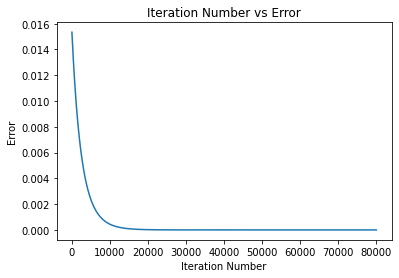

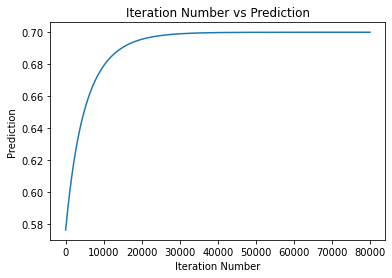

In [ ]:
import numpy
import matplotlib.pyplot

def sigmoid(sop):
    return 1.0/(1+numpy.exp(-1*sop))

def error(predicted, target):
    return numpy.power(predicted-target, 2)

def error_predicted_deriv(predicted, target):
    return 2*(predicted-target)

def sigmoid_sop_deriv(sop):
    return sigmoid(sop)*(1.0-sigmoid(sop))

def sop_w_deriv(x):
    return x

def update_w(w, grad, learning_rate):
    return w - learning_rate*grad

x1=0.1
x2=0.4

target = 0.7
learning_rate = 0.01

w1=numpy.random.rand()
w2=numpy.random.rand()

print("Initial W : ", w1, w2)

predicted_output = []
network_error = []

old_err = 0
for k in range(80000):
    # Forward Pass
    y = w1*x1 + w2*x2
    predicted = sigmoid(y)
    err = error(predicted, target)
    
    predicted_output.append(predicted)
    network_error.append(err)

    # Backward Pass
    g1 = error_predicted_deriv(predicted, target)

    g2 = sigmoid_sop_deriv(y)
    
    g3w1 = sop_w_deriv(x1)
    g3w2 = sop_w_deriv(x2)
    
    gradw1 = g3w1*g2*g1
    gradw2 = g3w2*g2*g1

    w1 = update_w(w1, gradw1, learning_rate)
    w2 = update_w(w2, gradw2, learning_rate)

    print(predicted)

matplotlib.pyplot.figure()
matplotlib.pyplot.plot(network_error)
matplotlib.pyplot.title("Iteration Number vs Error")
matplotlib.pyplot.xlabel("Iteration Number")
matplotlib.pyplot.ylabel("Error")

matplotlib.pyplot.figure()
matplotlib.pyplot.plot(predicted_output)
matplotlib.pyplot.title("Iteration Number vs Prediction")
matplotlib.pyplot.xlabel("Iteration Number")
matplotlib.pyplot.ylabel("Prediction")

In the next figure, the error is plotted for the 80,000 epochs. Note how the error is saturated at the value 3.150953682878443e-13, which is very close to 0.0.

The next figure shows how the predicted output changed by iteration. Remember that the correct output value is set to 0.7 in our example. The output is saturated at the value 0.6999994386664375, very close to 0.7.

In [ ]:
import MLP 
import numpy 
 
x = numpy.array([0.1, 0.4, 4.1]) 
y = numpy.array([0.2]) 

network_architecture = [7, 5, 4] 
 
# Network Parameters 
trained_ann = MLP.MLP.train(x=x, 
                            y=y, 
                            net_arch=network_architecture, 
                            max_iter=500, 
                            learning_rate=0.7, 
                            debug=True) 
 
print("Derivative Chains : ", trained_ann["derivative_chain"]) 
print("Training Time : ", trained_ann["training_time_sec"]) 
print("Number of Training Iterations : ", trained_ann["elapsed_iter"]) 
 
predicted_output = MLP.MLP.predict(trained_ann, numpy.array([0.2, 3.1, 1.7])) 
print("Predicted Output : ", predicted_output) 

ModuleNotFoundError: ignored

Types of backpropagation
There are 2 main types of the backpropagation algorithm:

Traditional backpropagation is used for static problems with a fixed input and a fixed output all the time, like predicting the class of an image. In this case, the input image and the output class never change. 
Backpropagation through time (BPTT) targets non-static problems that change over time. It’s applied in time-series models, like recurrent neural networks (RNN). 
Drawbacks of the backpropagation algorithm
Even though the backpropagation algorithm is the most widely used algorithm for training neural networks, it has some drawbacks:

The network should be designed carefully to avoid the vanishing and exploding gradients which affect the way the network learns. For example, the gradients calculated out of the sigmoid activation function may be very small, close to zero, which makes the network unable to update its weights. As a result, no learning happens.
The backpropagation algorithm considers all neurons in the network equally, and calculates their derivatives for each backward pass. Even when dropout layers are used, the derivatives of the dropped neurons are calculated, and then dropped.
Backpropagation relies on inﬁnitesimal effects (partial derivatives) to perform credit assignment. This could become a serious issue as one considers deeper and more non-linear functions.
It expects that the error function is convex. For a non-convex function, backpropagation might get stuck in a local optima solution.
The error function and the activation function must be differentiable in order for the backpropagation algorithm to work. It won’t work with non-differentiable functions.
In the forward pass, layer i+1 must wait the calculations of layer i to complete. In the backward pass, layer i must wait layer i+1 to complete. This makes all layers of the network locked, waiting for the remainder of the network to execute forwards and propagate error backwards, before they can be updated.
Alternatives to traditional backpropagation
There are a number of alternatives to the traditional back propagation. Below are 4 alternatives.

In Lee, Dong-Hyun, et al. “Difference target propagation.” Joint european conference on machine learning and knowledge discovery in databases. Springer, Cham, 2015., the main idea is to compute targets rather than gradients, at each layer. Like gradients, they are propagated backwards. Target propagation relies on auto-encoders at each layer. Unlike back-propagation, it can be applied even when units exchange stochastic bits rather than real numbers.

For Ma, Wan-Duo Kurt, J. P. Lewis, and W. Bastiaan Kleijn. “The hsic bottleneck: Deep learning without back-propagation.” Proceedings of the AAAI Conference on Artificial Intelligence. Vol. 34. No. 04. 2020., they propose HSIC (Hilbert-Schmidt independence criterion) bottleneck for training deep neural networks. The HSIC bottleneck is an alternative to conventional backpropagation, with a number of distinct advantages. The method facilitates parallel processing, and requires signiﬁcantly less operations. It doesn’t suffer from exploding or vanishing gradients. It’s biologically more plausible than backpropagation, as there’s no requirement for symmetric feedback.

In Choromanska, Anna, et al. “Beyond backprop: Online alternating minimization with auxiliary variables.” International Conference on Machine Learning. PMLR, 2019., they propose an online (stochastic/mini-batch) alternating minimization (AM) approach for training deep neural networks.

In Jaderberg, Max, et al. “Decoupled neural interfaces using synthetic gradients.” International Conference on Machine Learning. PMLR, 2017., they break the constraint of locking layers by decoupling modules (i.e. layers), and introduce a model of the future computation of the network graph. These models predict what the result of the modelled subgraph will produce using only local information. As a result, the subgraphs can be updated independently and asynchronously.

Conclusion
Hopefully, now you see why backpropagation is the most popular algorithm for training artificial neural networks. It’s quite powerful, and the way it works inside is fascinating. Thanks for reading!